# Single Asset

Consider an agent performing optimal execution within a time interval $\mathbb{T}_N$, specifically over a time window $[0,T]$ divided into $N$ equally spaced intervals of length $\tau = T/N$. For a single asset to be sold (or bought), with an initial quantity $q_0$, the return $(y_t = S_{t+1} - S_{t})$ evolves according to:

$$ x_{t+1} = A_tx_{t} + B_tu_t + \omega_t $$
$$ y_t = C_tx_t + D_t u_t$$

where $x_t$ represents the permanent impact at time $t \in \mathbb{T}_N$, $\omega_t$ is a general noise term, and $u_t$ denotes the volume sold at time $t \in \mathbb{T}_N$ (note: $\sum_{t \in \mathbb{T}_N} u_t = q_0$).

The coefficients $A_t, B_t, C_t, D_t$ are defined as follows:
- $A_t$: parameter for the memory of the autoregressive permanent impact,
- $B_t$: intensity parameter of the control on impact,
- $C_t$: intensity of cross-impact,
- $D_t$: temporary impact.

To determine an optimal policy $\Pi: \mathbb{R} \to \mathbb{R}$, the agent needs to estimate these autoregressive coefficients accurately.

Estimation/action steps:
1. Filter the coefficients
2. Take action
3. Minimise loss
4. Backprop
5. Weights adj. 

## Environment

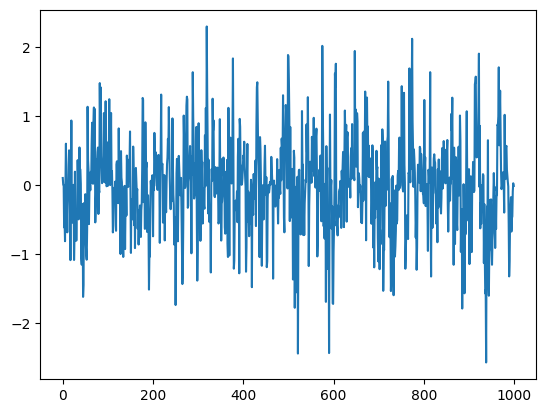

In [27]:
import numpy as np
import matplotlib.pyplot as plt

N=1000
x_0 = 0.001
y_0 = 0.1
uai = np.zeros(N)
y = np.zeros(N)
y[0] = 0.1
u_0 = 0
for i in range(1,N):
    A = np.random.rand()
    B = np.random.rand()
    C = 1#np.random.rand()
    D = 0.002#np.random.rand()
    x    = A*x_0 + B*u_0 + 1/N**(0.5)*np.random.standard_normal()
    y[i] = C*x_0 + D*u_0
    x_0 = x
    y_0 = y
    u_0 = np.random.normal(0,1)

plt.plot(y);

In [37]:
import numpy as np

# Numero di stati e di passi temporali
n_states = 3
n_steps = 10

# Definiamo alcune matrici di transizione variabili nel tempo (time-varying)
transition_matrices = []
for t in range(n_steps):
    # Per ogni passo temporale t, creiamo una matrice di transizione casuale
    matrix = np.random.rand(n_states, n_states)
    # Normalizziamo ogni riga per garantire che ogni matrice sia una matrice di probabilità
    matrix = matrix / matrix.sum(axis=1, keepdims=True)
    transition_matrices.append(matrix)

# Stato iniziale (probabilità di essere in ogni stato all'inizio)
initial_state = np.array([1.0, 0.0, 0.0])  # Partiamo dallo stato 0

# Evolve lo stato nel tempo utilizzando le matrici di transizione
states_over_time = [initial_state]
current_state = initial_state

for t in range(n_steps):
    # Moltiplichiamo lo stato corrente per la matrice di transizione del tempo t
    next_state = np.dot(current_state, transition_matrices[t])
    states_over_time.append(next_state)
    current_state = next_state

# Mostriamo le matrici di transizione e gli stati evoluti nel tempo
#transition_matrices, 
np.array(states_over_time)


array([[1.        , 0.        , 0.        ],
       [0.76813734, 0.18605733, 0.04580533],
       [0.29169532, 0.28041014, 0.42789454],
       [0.37797104, 0.26451467, 0.3575143 ],
       [0.2988844 , 0.48735335, 0.21376225],
       [0.2518717 , 0.20242254, 0.54570576],
       [0.25512741, 0.5528412 , 0.19203138],
       [0.38921801, 0.3528737 , 0.25790829],
       [0.29031338, 0.42297703, 0.28670958],
       [0.39932393, 0.43273573, 0.16794034],
       [0.28628383, 0.64625112, 0.06746506]])

In [36]:
A = np.array([0.9, 0.1])
x = np.array([0.1, 0.9])

A.dot(x)
M = 1  # Example value for M
A_k = np.random.rand(M**2, 2 * M**2)
print(A_k)
w_k = np.random.rand(2 * M**2)
print(w_k)


A*3+4*5+w_k

[[0.46248669 0.55017487]]
[0.96312815 0.24520464]


array([23.66312815, 20.54520464])

In [2]:
import numpy as np

# Parametri
n = 4  # Dimensione del vettore di stato
m = 2  # Dimensione del vettore di controllo
timesteps = 10  # Numero di passi temporali

# Inizializza lo stato e l'input di controllo
x_t = np.random.rand(n)  # Stato iniziale casuale
u_t = np.random.rand(m)  # Controllo iniziale casuale

# Genera una matrice B_t fissa per tutto il sistema
B_t = np.random.rand(n, m)

# Vettore per tenere traccia dell'evoluzione dello stato
states = [x_t]

# Simulazione temporale
for t in range(timesteps):
    # Genera una matrice A_t variabile nel tempo (ad esempio, cambia leggermente ogni passo)
    A_t = np.eye(n) + 0.1 * np.random.rand(n, n)  # Inizia da identità e aggiunge piccoli cambiamenti casuali
    
    # Genera rumore casuale
    w_t = np.random.normal(0, 0.1, size=n)
    
    # Calcola il nuovo stato
    x_t_next = A_t @ x_t + B_t @ u_t + w_t  # Stato successivo
    
    # Aggiorna lo stato
    x_t = x_t_next
    states.append(x_t)

# Stampa l'evoluzione degli stati
for t, state in enumerate(states):
    print(f"Stato al tempo {t}: {state}")
    print(f"matrice: {A_t}")


Stato al tempo 0: [0.70853771 0.64839065 0.64626951 0.93326167]
matrice: [[1.09684394 0.05596822 0.08707818 0.08069618]
 [0.0680043  1.05768341 0.04118747 0.06725737]
 [0.06391255 0.07477348 1.00587532 0.06101389]
 [0.0550227  0.00455203 0.09312628 1.09691727]]
Stato al tempo 1: [1.04831573 0.74887431 1.37059042 1.16014225]
matrice: [[1.09684394 0.05596822 0.08707818 0.08069618]
 [0.0680043  1.05768341 0.04118747 0.06725737]
 [0.06391255 0.07477348 1.00587532 0.06101389]
 [0.0550227  0.00455203 0.09312628 1.09691727]]
Stato al tempo 2: [1.30826817 0.86853802 1.91285666 1.38684614]
matrice: [[1.09684394 0.05596822 0.08707818 0.08069618]
 [0.0680043  1.05768341 0.04118747 0.06725737]
 [0.06391255 0.07477348 1.00587532 0.06101389]
 [0.0550227  0.00455203 0.09312628 1.09691727]]
Stato al tempo 3: [1.98788769 0.89225733 2.67775845 1.91045118]
matrice: [[1.09684394 0.05596822 0.08707818 0.08069618]
 [0.0680043  1.05768341 0.04118747 0.06725737]
 [0.06391255 0.07477348 1.00587532 0.06101389]


In [40]:
import ambiente as amb
import numpy as np

price_0 = 0.01
T = 10
n = 20
imp_0 = np.ones((n)) * 0.001
A_0 = np.ones((n,n)) * np.random.rand(n, n)
B_0 = np.ones((n,n)) * np.random.rand(n, n)
C_0 = np.ones((n,n)) * np.random.rand(n, n)
D_0 = np.ones((n,n)) * np.random.rand(n, n)
y_0 = np.ones((n,n)) * 0.01
u_t = np.zeros(n)

ritorni = np.zeros((n, T))
imp = []

pri = amb.Price(price_0, imp_0, A_0, B_0, C_0, D_0, y_0, u_t, N_assets = n)

for t in range(T):
    u_t = np.random.uniform(low=0.0, high=10.0, size=n)
    ritorni[..., t], impact = pri.get_price_ret(u_t)
    imp.append(impact)

ritorni, imp

(array([[5.09242150e+02, 5.32302798e+03, 5.49286166e+04, 5.68254788e+05,
         5.87778426e+06, 6.07995837e+07, 6.28907874e+08, 6.50539554e+09,
         6.72915260e+10, 6.96060589e+11],
        [5.46586264e+02, 5.74620362e+03, 5.95148295e+04, 6.15697473e+05,
         6.36889298e+06, 6.58793764e+07, 6.81453765e+08, 7.04892801e+09,
         7.29138016e+10, 7.54217161e+11],
        [5.51509581e+02, 5.93900884e+03, 6.16284764e+04, 6.37572587e+05,
         6.59526208e+06, 6.82211077e+07, 7.05676029e+08, 7.29948222e+09,
         7.55055229e+10, 7.81025812e+11],
        [5.10129161e+02, 5.50372610e+03, 5.69623491e+04, 5.89412917e+05,
         6.09681423e+06, 6.30651121e+07, 6.52342719e+08, 6.74780463e+09,
         6.97989947e+10, 7.21997734e+11],
        [5.81872686e+02, 6.06504167e+03, 6.26197590e+04, 6.47960617e+05,
         6.70230498e+06, 6.93281799e+07, 7.17127857e+08, 7.41793870e+09,
         7.67308322e+10, 7.93700357e+11],
        [4.66736653e+02, 4.66156472e+03, 4.76884846e+04, 4.9